In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from  matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.preprocessing import StandardScaler



In [4]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
raw_data = pd.read_excel('cust_data.xlsx',index_col=0)
raw_data.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [7]:
raw_data.info()
raw_data.shape
raw_data.describe()
# data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  Hewlett

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


C:\Users\Jos Joe\AppData\Local\Temp\ipykernel_14908\1419969965.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data[i],ax = subplot)


ValueError: could not convert string to float: 'M'

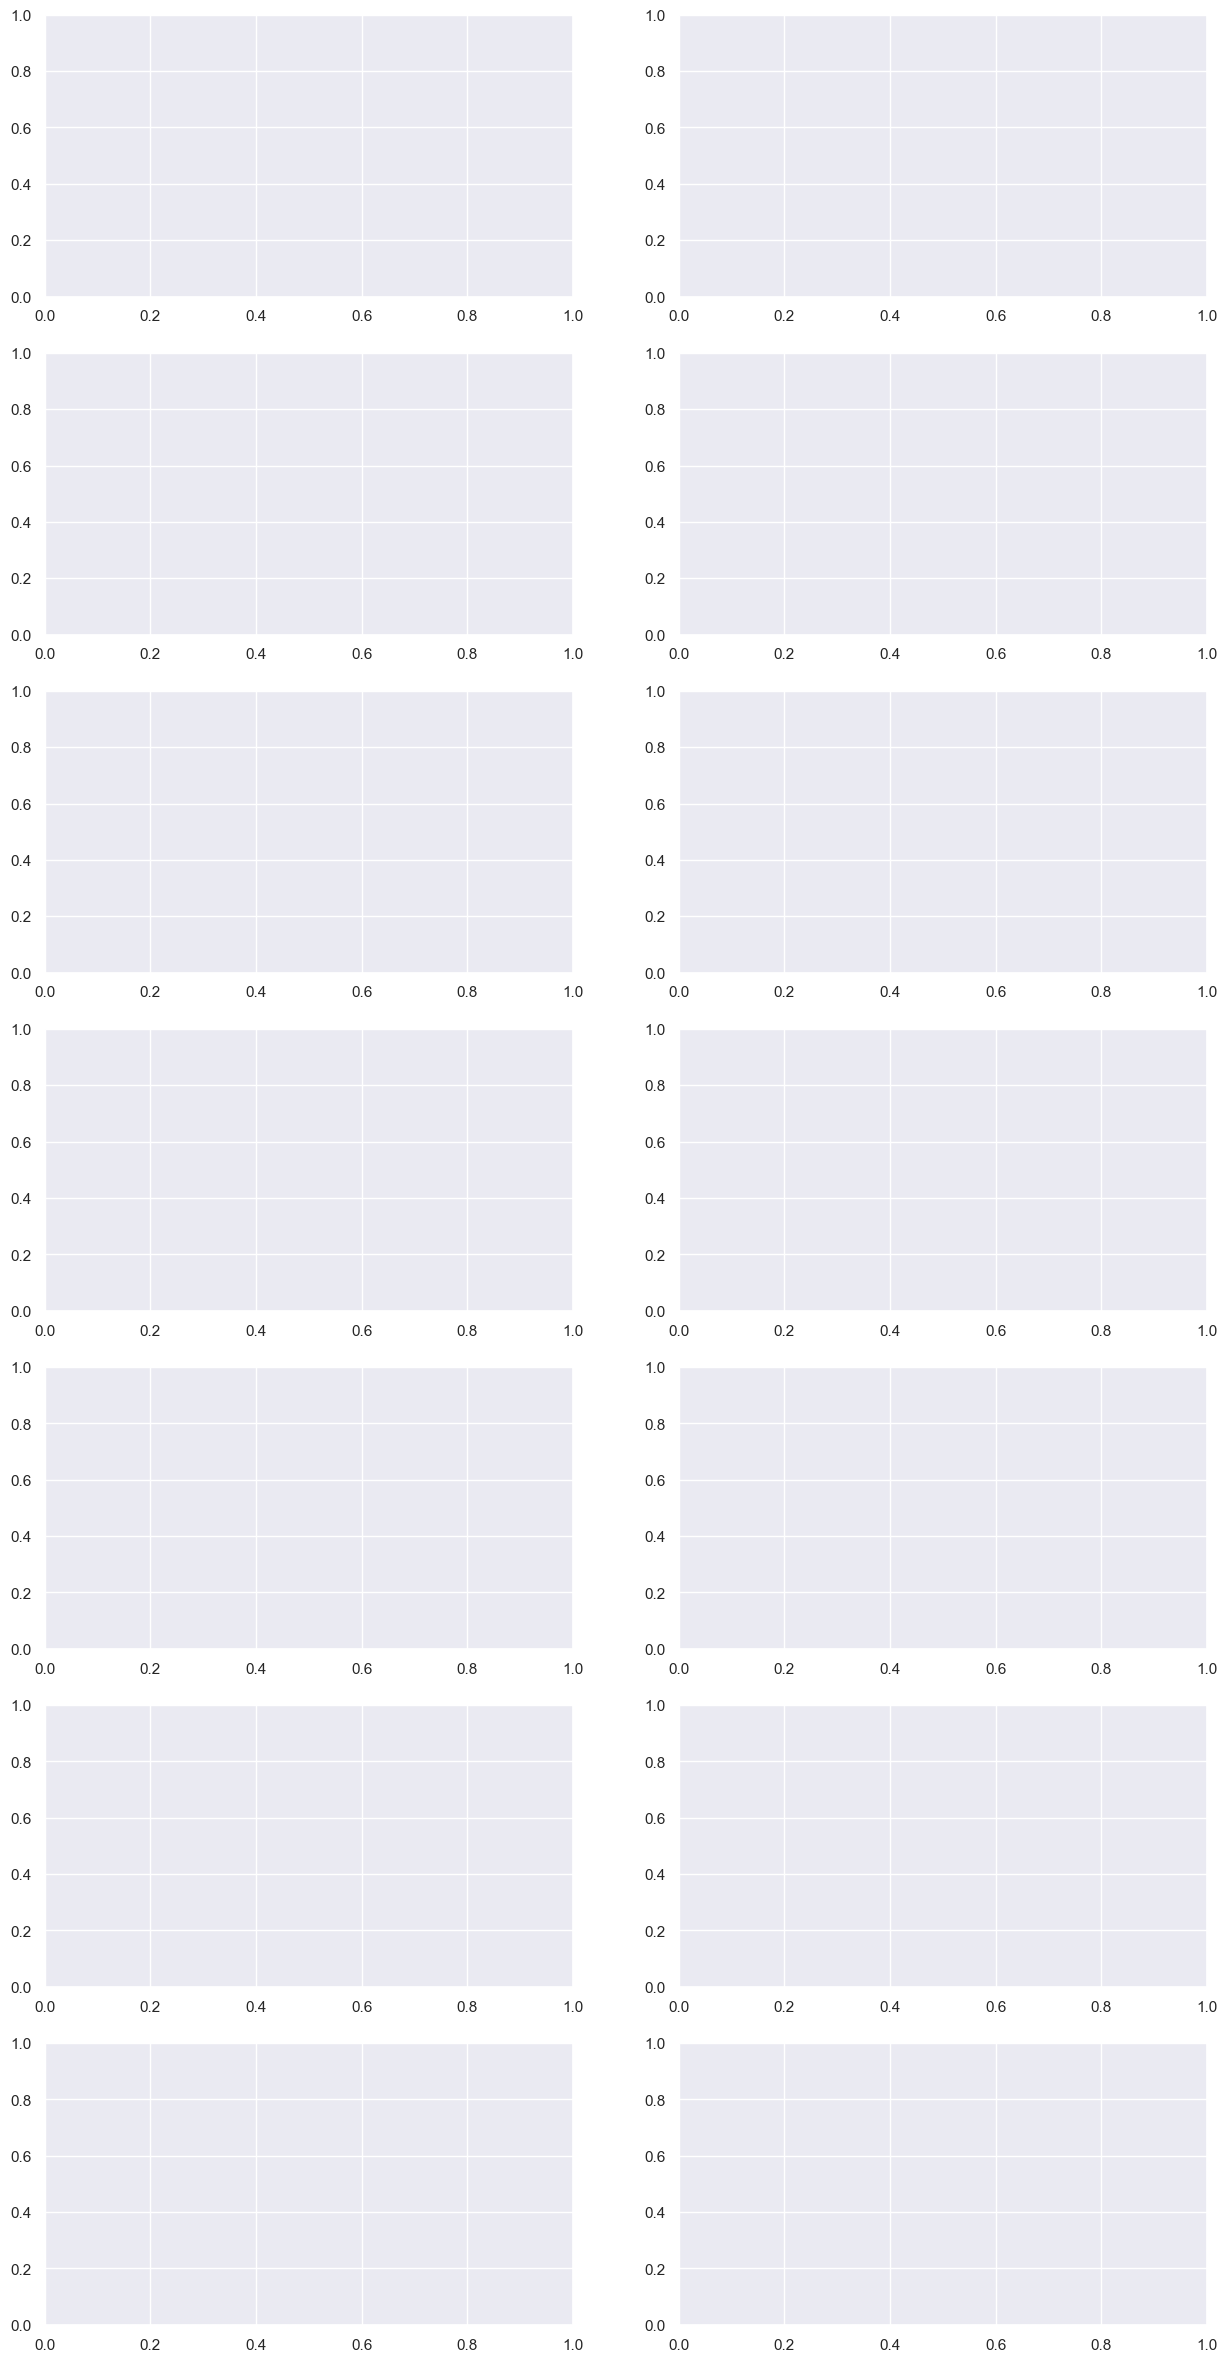

In [11]:
num = raw_data.select_dtypes(include = np.number)
cat = raw_data.select_dtypes(include = 'object')
cols=raw_data.columns


fig,ax = plt.subplots(7,2,figsize = (15,30))
for i,subplot in zip(cols,ax.flatten()):
    sns.distplot(raw_data[i],ax = subplot)
plt.suptitle('Distribution of numeric variables',y = 1,fontsize=25)
plt.tight_layout()
plt.show()

for col,subplot in zip(cat,ax.flatten()):
    sns.countplot(x = raw_data[col],ax = subplot,palette = 'YlGnBu')
    subplot.tick_params(axis='x', rotation=60)
    
fig,ax = plt.subplots(4,2,figsize = (10,12))
for col,subplot in zip(num,ax.flatten()):
    sns.boxplot(raw_data[col],ax=subplot)
plt.suptitle('Boxplot of the numeric variables')
plt.tight_layout()

fig,ax = plt.subplots(7,2,figsize = (15,30))
for i,subplot in zip(num,ax.flatten()):
    sns.boxplot(y = data[i], x=data['price_range'], ax=subplot,palette = 'Set2_r')
plt.suptitle('Numeric variables vs Price Range',y = 1.0,fontsize=25)
plt.tight_layout()

for i,subplot in zip(cat,ax.flatten()):
    sns.countplot(x = data[i],hue=data['price_range'],ax=subplot,palette = 'rainbow')
plt.suptitle('Categorical variables Vs Price Range',y = 1,fontsize=25)
plt.tight_layout()



In [ ]:
q1 = df_features.quantile(0.25)
q3 = df_features.quantile(0.75)
iqr = q3 - q1
df_heart = df_heart[~((df_heart < (q1 - 1.5*iqr))|(df_heart > (q3 + 1.5*iqr))).any(axis=1)]
df_heart = df_heart.reset_index(drop = True)

In [ ]:
cols = ['Orders','Gender']
fig,ax = plt.subplots(2,1,figsize=(12,8))
for i,subplot in zip(cols,ax.flatten()):
    sns.countplot(x = raw_data[i],ax=subplot,palette = 'Set2_r' )
    total = len(raw_data)
    for p in subplot.patches:
        percent = '{:.2f}%'.format(100*p.get_height()/total)
        x = p.get_x() + (p.get_width())/2
        y = p.get_height() + 70
        subplot.annotate(percent,(x,y),ha='center')
plt.tight_layout()
plt.show()

In [ ]:
total = raw_data.isnull().sum().sort_values(ascending = False)
percent = (raw_data.isnull().sum()/len(raw_data) * 100)
missing_values = pd.concat([total,percent],axis = 1, keys = ['Total','Percent of missing values'])
missing_values
sns.heatmap(raw_data.isnull(),cbar  =False)
plt.title('Heatmap for missing values')

In [ ]:
data = pd.get_dummies(raw_data,columns = ['Gender'])
data.head()

In [ ]:
fig = data.hist(figsize = (18,18))

In [ ]:
corr = data.corr()
fig,ax = plt.subplots(figsize = (50,50))
sns.heatmap(corr[(corr>0.9)|(corr<-0.9)],annot = True,annot_kws = {'size':10},cmap = 'YlGnBu',fmt = '.2f',linewidths = 0.1)

In [ ]:
features = data.drop(['Orders','Gender_F','Gender_M'],axis =1)
features.head()

In [ ]:
scale = StandardScaler().fit(features)
features = scale.transform(features)

In [ ]:
cov_mat = np.cov(features.T)
print(cov_mat[0:5])

In [ ]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [ ]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)

In [ ]:
plt.plot(eig_val,'bp')
plt.plot(eig_val)
plt.xlabel('Principal Components')
plt.ylabel('Percent of explained variance')
plt.annotate(text='Elbow Point',xy=(6,1.25), xytext = (8,1.5),
            arrowprops = dict(facecolor = 'black',arrowstyle ='simple'))
plt.title('Scree Plot')
plt.show()

In [ ]:
pca = PCA(n_components = 6,random_state = 10)
PrincipalComponents = pca.fit_transform(features)

In [ ]:
df_pca = pd.DataFrame(data = PrincipalComponents ,
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
#'PC3','PC4','PC5','PC6','PC7'
df_pca.head()

In [ ]:
data.iloc[0:2,1:36]

In [ ]:
features_scaled = pd.DataFrame(features,columns = data.columns[1:36])
features_scaled.head()

In [ ]:
n_clusters = [4,5,6,7,8]
for K in n_clusters:
    cluster = KMeans(n_clusters = K,random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    score = silhouette_score(features_scaled,predict,random_state = 10)
    print('For n_clusters = {},silhouette score is {}'.format(K,score))

In [ ]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
model = KMeans(n_clusters = 4,random_state = 10)
model.fit(features_scaled)

In [ ]:
data_output = data.copy(deep = True)
data_output['Cluster'] = model.labels_
data_output.sample()

In [ ]:
data_output.Cluster.value_counts()

In [ ]:
np.unique(model.labels_,return_counts = True)

In [ ]:
g= sns.countplot(data = data_output,x = 'Cluster',palette = 'rainbow')
plt.title('Cluster Size')
plt.xlabel('Clusters')
plt.ylabel('No of customers')
for p in g.patches:
    value = '{}'.format(p.get_height())
    x = p.get_x() + 0.4
    y = p.get_height()+ 150
    g.annotate(value, (x, y),ha='center')

In [ ]:
centers = pd.DataFrame(model.cluster_centers_,columns = data_output.columns[1:36])

In [ ]:
centers.sample()

In [ ]:
cluster_1 = sorted(zip(list(centers.iloc[0,:]),list(centers.columns)),reverse = True)[:10]

In [ ]:
cluster_1

In [ ]:
np.unique(model.labels_,return_counts = True)[1][0]

In [ ]:
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var 

In [ ]:
data_output[['Orders','Gender_F','Gender_M','Cluster']][data_output.Cluster == 0].describe()

In [ ]:
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]

In [ ]:
cluster_2

In [ ]:
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:10]
np.unique(model.labels_, return_counts=True)[1][1]
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var
data_output[['Orders', 'Gender_F', 'Gender_M', 'Cluster']][data_output.Cluster == 1].describe()